# Is the MLP trained well?

I would argue that the MLPs are trained well for both prospective-ERM and follow-the-leader because risk on past data is 0, i.e., we minimize the empirical risk. 

We take 2 checkpoints to demonstrate this

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting prospective risk for small / larger MLPs

In [2]:
errs = {}

fnames = [
    ("Follow-the-leader", "../checkpoints/scenario2_v2/minimlp_erm_errs.pkl"),
    ("Prospective", "../checkpoints/scenario2_v2/minimlp_prospective_errs.pkl"),
    ("Online gradient descent", "../checkpoints/scenario2_v2/minimlp_ft1_errs.pkl"),
    ("Bayesian gradient descent", "../checkpoints/scenario2_v2/minimlp_bgd_errs.pkl"),
]
    
for tag, fn in fnames:
    with open(fn, "rb") as fp:
        errs[tag] = pickle.load(fp)

In [3]:
tab = []
for key in errs:
    tab.append((key, errs[key][0][4][1]))

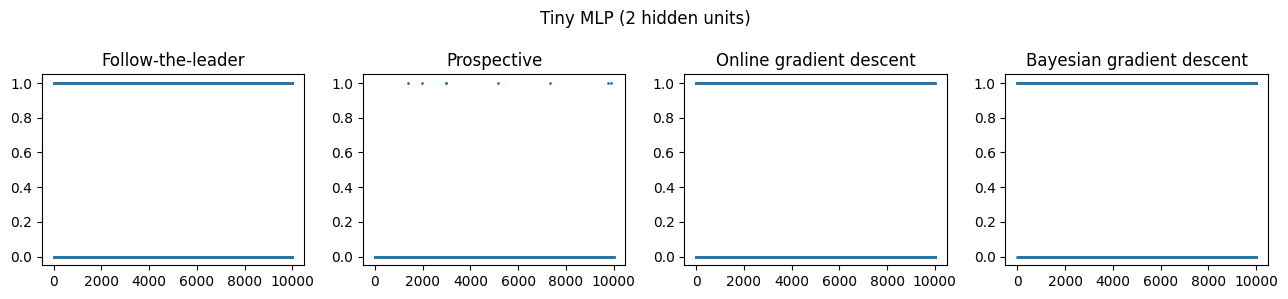

In [4]:
T = len(tab[0][1])
plt.figure(figsize=(13, 3))
plt.suptitle("Tiny MLP (2 hidden units)")
for i, row in enumerate(tab):
    plt.subplot(1, 4, i+1)
    plt.title(row[0])
    plt.scatter(np.arange(T), row[1], s=1)
plt.tight_layout()
plt.show()

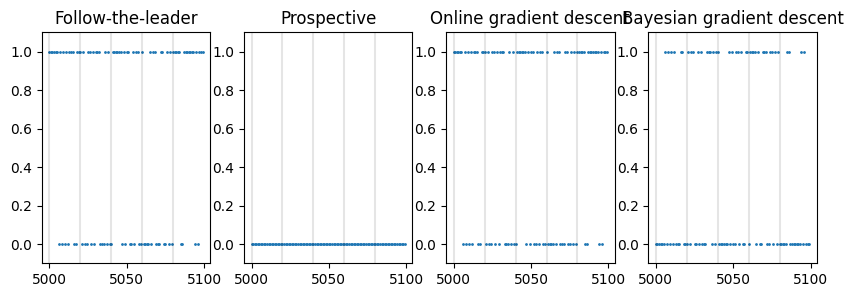

In [5]:
T = len(tab[0][1])
start, end = 5000, 5100
plt.figure(figsize=(10, 3))
for i, row in enumerate(tab):
    plt.subplot(1, 4, i+1)
    plt.title(row[0])
    plt.scatter(np.arange(T)[start:end], row[1][start:end], s=1)
    #plt.plot(np.arange(T)[start:end], row[1][start:end])

    for j in range(start, end, 20):
        plt.axvline(x=j, c='black', alpha=0.1)
    plt.ylim(-0.1, 1.1)
plt.show()

In [6]:
errs_large = {}

fnames = [
    ("Follow-the-leader", "../checkpoints/scenario2_v2/mlp_erm_errs.pkl"),
    ("Prospective", "../checkpoints/scenario2_v2/mlp_prospective_errs.pkl"),
    ("Online gradient descent", "../checkpoints/scenario2_v2/mlp_ft1_errs.pkl"),
    ("Bayesian gradient descent", "../checkpoints/scenario2_v2/mlp_bgd_errs.pkl"),
]
    
for tag, fn in fnames:
    with open(fn, "rb") as fp:
        errs_large[tag] = pickle.load(fp)

In [7]:
tab_l = []
for key in errs:
    tab_l.append((key, errs_large[key][0][-1][1]))

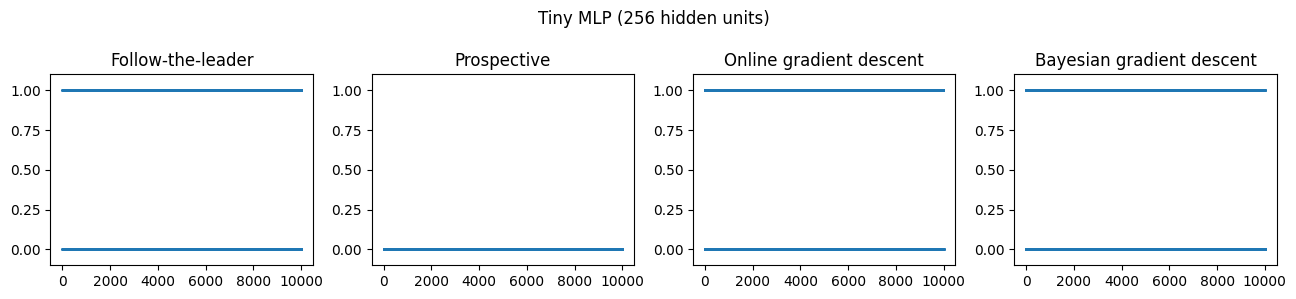

In [8]:
T = len(tab_l[0][1])
plt.figure(figsize=(13, 3))
plt.suptitle("Tiny MLP (256 hidden units)")
for i, row in enumerate(tab_l):
    plt.subplot(1, 4, i+1)
    plt.title(row[0])
    plt.scatter(np.arange(T), row[1], s=1)
    plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

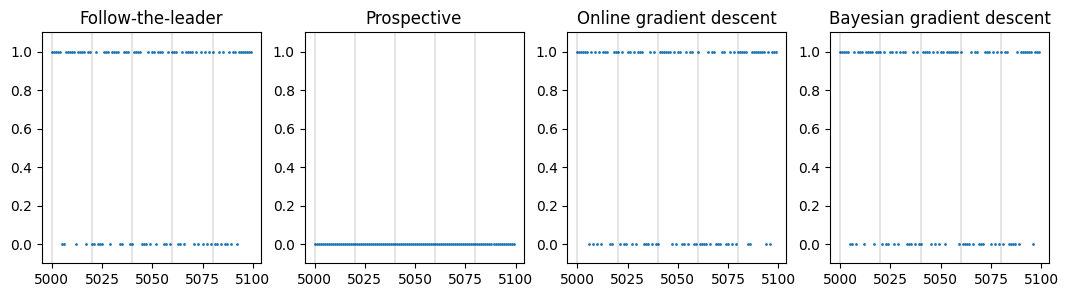

In [9]:
T = len(tab_l[0][1])
start, end = 5000, 5100
plt.figure(figsize=(13, 3))
for i, row in enumerate(tab_l):
    plt.subplot(1, 4, i+1)
    plt.title(row[0])
    plt.scatter(np.arange(T)[start:end], row[1][start:end], s=1)
    #plt.plot(np.arange(T)[start:end], row[1][start:end])

    for j in range(start, end, 20):
        plt.axvline(x=j, c='black', alpha=0.1)
    plt.ylim(-0.1, 1.1)
plt.show()

# Plotting instantaneous risk

In [10]:
errs_i = {}

fnames = [
    ("Follow-the-leader", "../checkpoints/scenario2_v2/minimlp_erm_all_errs.pkl"),
]
    
for tag, fn in fnames:
    with open(fn, "rb") as fp:
        errs_i[tag] = pickle.load(fp)

In [25]:
mat_i = []
names = []
for tag in errs_i:
    mat = []
    
    for t, acc in errs_i[tag][0]:
        mat.append((t, acc[t+1]))
    mat_i.append(mat)
    names.append(tag)

mat_i = np.array(mat_i)

In [26]:
mat_i

array([[[ 20.,   0.],
        [ 21.,   0.],
        [ 22.,   0.],
        [ 23.,   0.],
        [ 24.,   0.],
        [ 25.,   0.],
        [ 26.,   0.],
        [ 27.,   0.],
        [ 28.,   0.],
        [ 29.,   1.],
        [ 30.,   0.],
        [ 31.,   0.],
        [ 32.,   1.],
        [ 33.,   1.],
        [ 34.,   1.],
        [ 35.,   1.],
        [ 36.,   1.],
        [ 37.,   0.],
        [ 38.,   1.],
        [ 39.,   0.],
        [ 40.,   1.],
        [ 41.,   1.],
        [ 42.,   0.],
        [ 43.,   1.],
        [ 44.,   1.],
        [ 45.,   0.],
        [ 46.,   1.],
        [ 47.,   0.],
        [ 48.,   0.],
        [ 49.,   0.],
        [ 50.,   1.],
        [ 51.,   0.],
        [ 52.,   1.],
        [ 53.,   1.],
        [ 54.,   0.],
        [ 55.,   0.],
        [ 56.,   0.],
        [ 57.,   1.],
        [ 58.,   0.],
        [ 59.,   0.],
        [ 60.,   0.],
        [ 61.,   1.],
        [ 62.,   0.],
        [ 63.,   0.],
        [ 64.,   0.],
        [ 

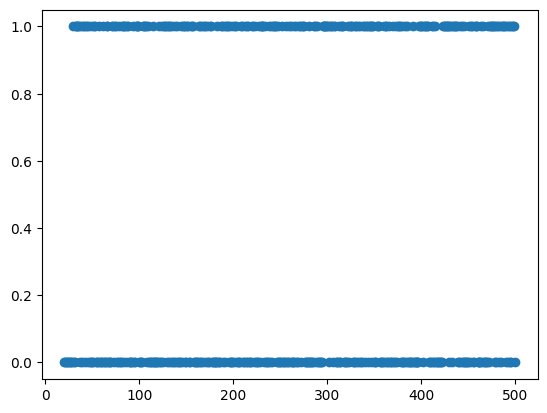

In [30]:
plt.scatter(mat_i[0, :, 0], mat_i[0, :, 1])

In [ ]:
errs_